# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
TRAIN_classes = 'alpha-classes'

data_config = {
  "data_unit" : sup.DATA_S_PV,
  "seq_len" : 12,
  "PH2" : False,
  "input_dim" : 72,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 1024,
  

}

train_config = {
  "device" : bert.device,
  "arch" : sup.TRAIN_BERT_CODE,
  "loadable" : bert.DISTILBERT,
  "optimizer" : optim.AdamW,
  "lr" : 2e-5,
  "weight_decay" : 1e-4,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 5000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, 
                  train_config=train_config)

In [6]:
model.fit(verbose=True, perfect=True)

Training:  20%|██        | 1000/5000 [1:44:08<6:38:11,  5.97s/epoch, epoch=1000, loss=0.0951]

999 2e-05


Training:  40%|████      | 2000/5000 [3:39:02<5:01:26,  6.03s/epoch, epoch=2000, loss=0.00757]  

1999 1e-05


Training:  60%|██████    | 3000/5000 [5:19:45<3:22:04,  6.06s/epoch, epoch=3000, loss=0.00246] 

2999 5e-06


Training:  80%|████████  | 4000/5000 [6:58:21<1:37:54,  5.87s/epoch, epoch=4000, loss=0.00157] 

3999 2.5e-06


4999 1.25e-06


0.9033898305084745


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:230: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


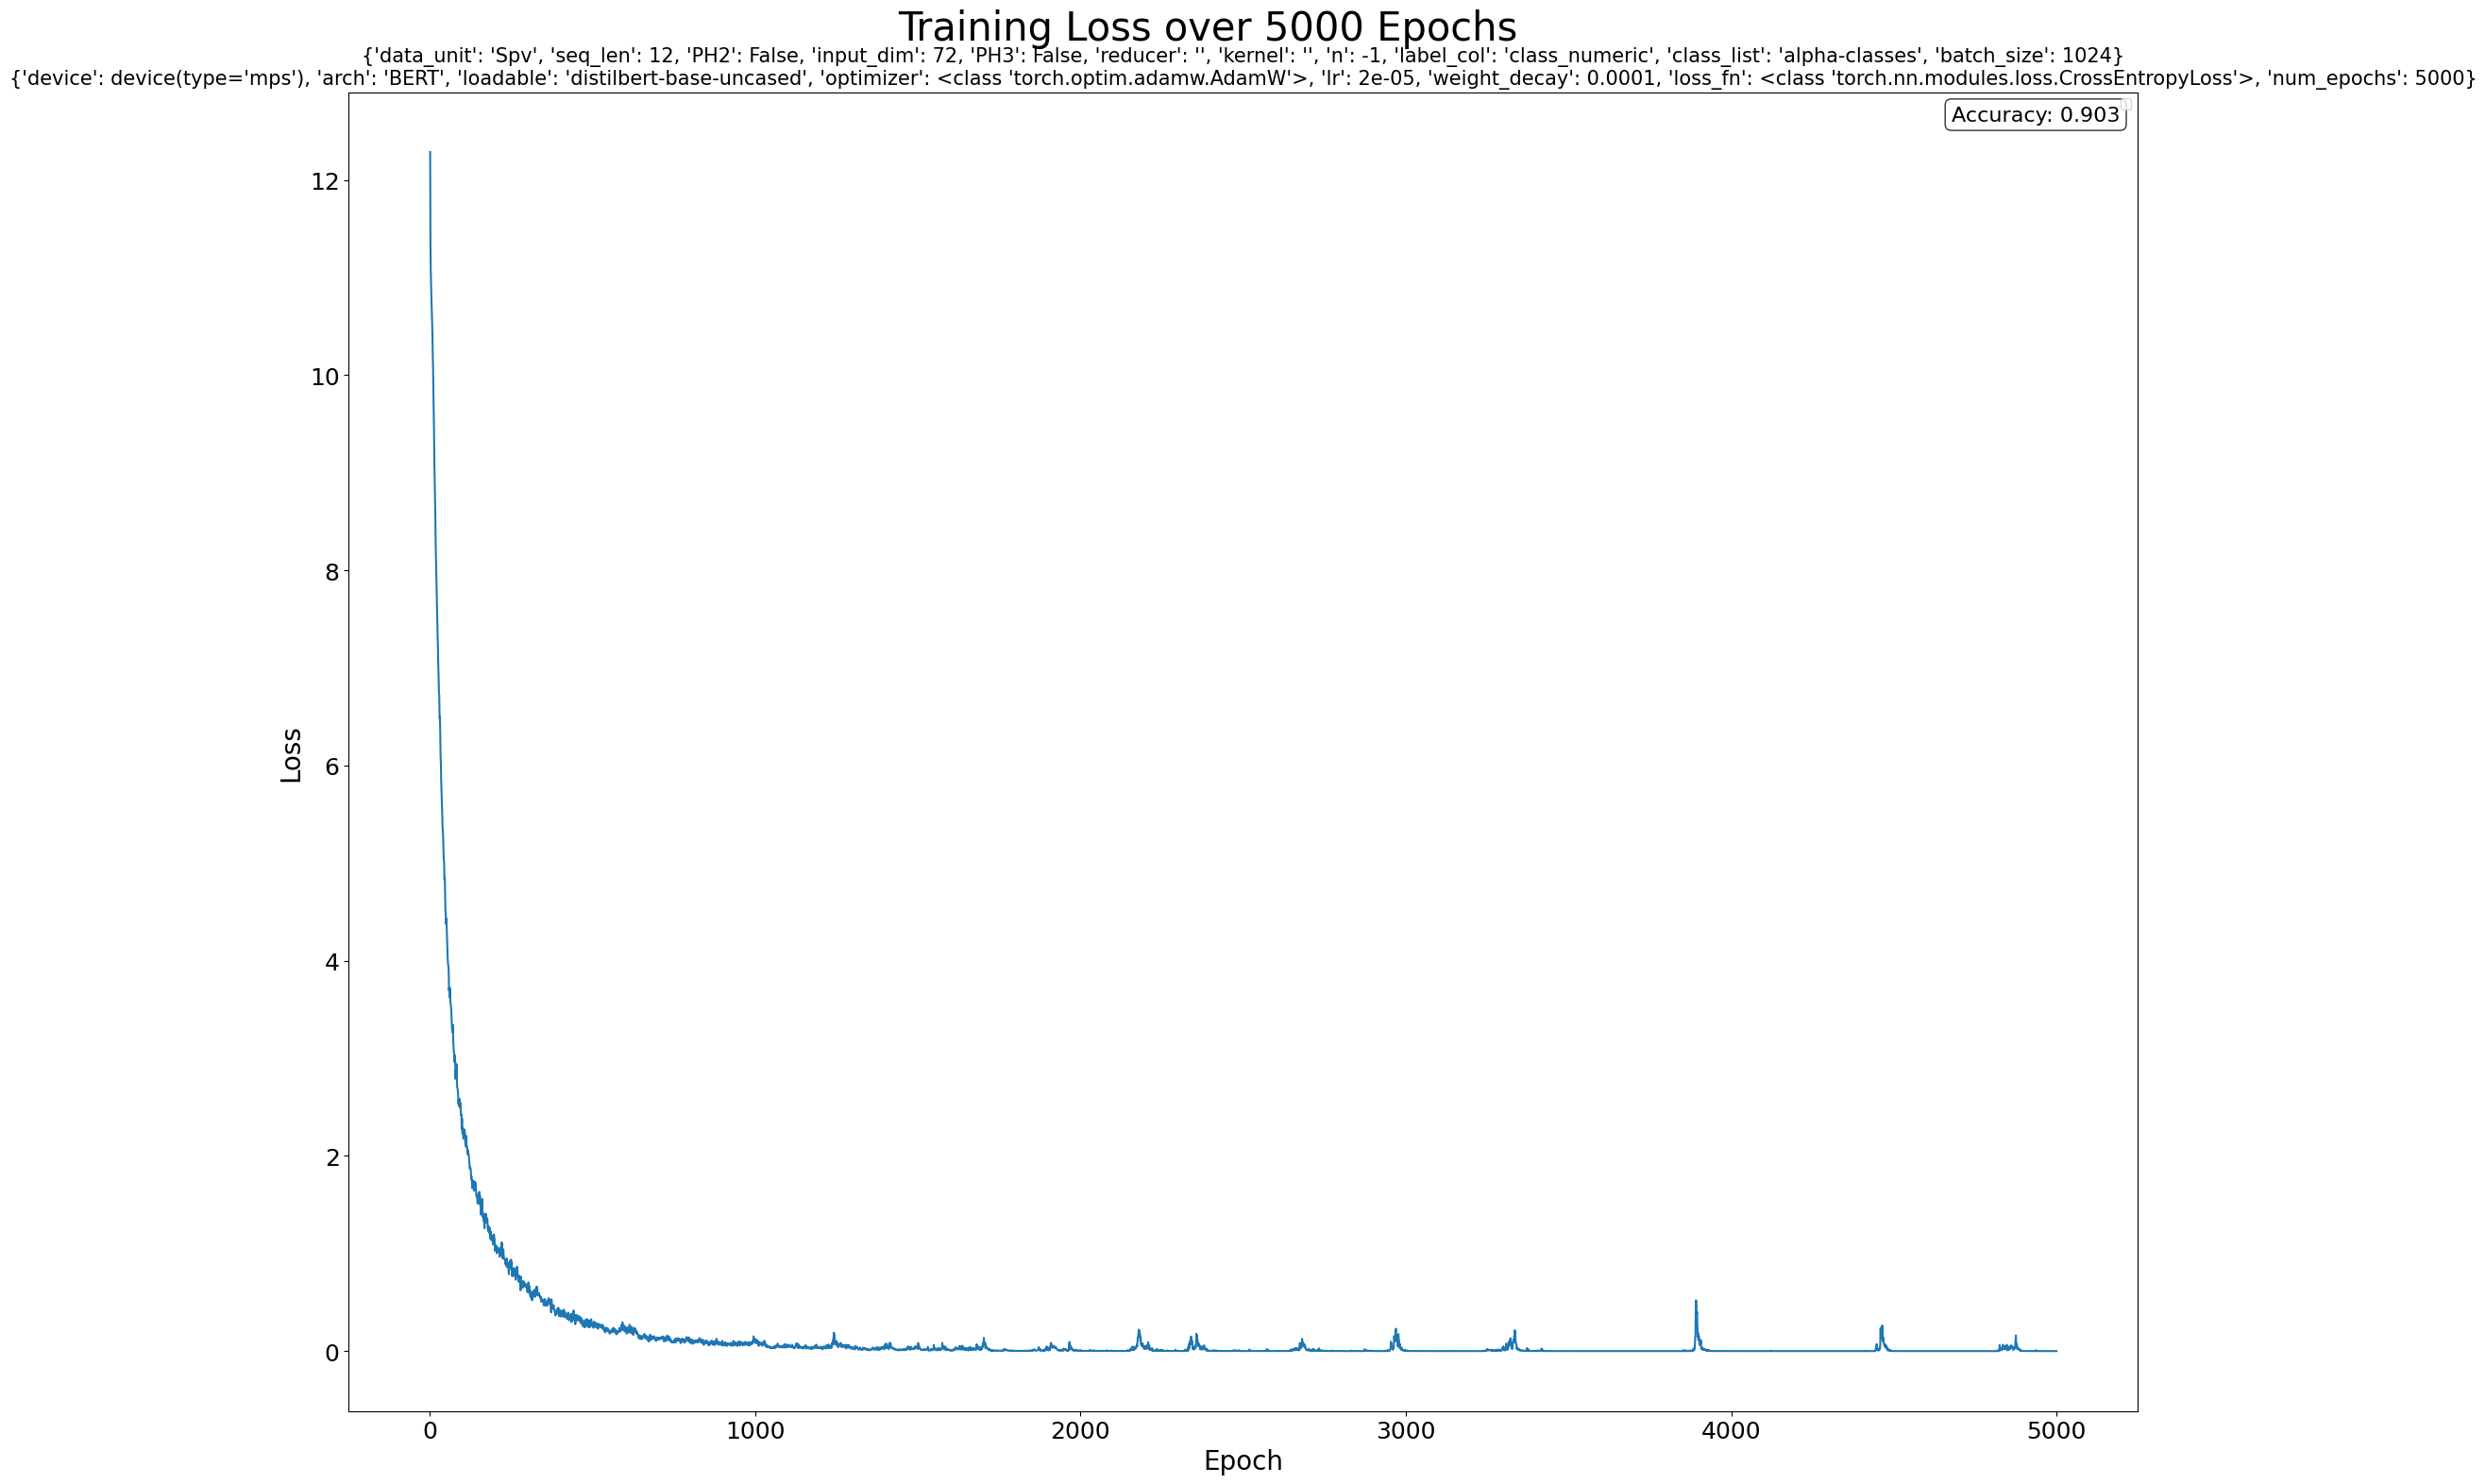

In [7]:
model.score()
print(model.accuracy)
model.show_loss()

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased exists. Continuing with execution


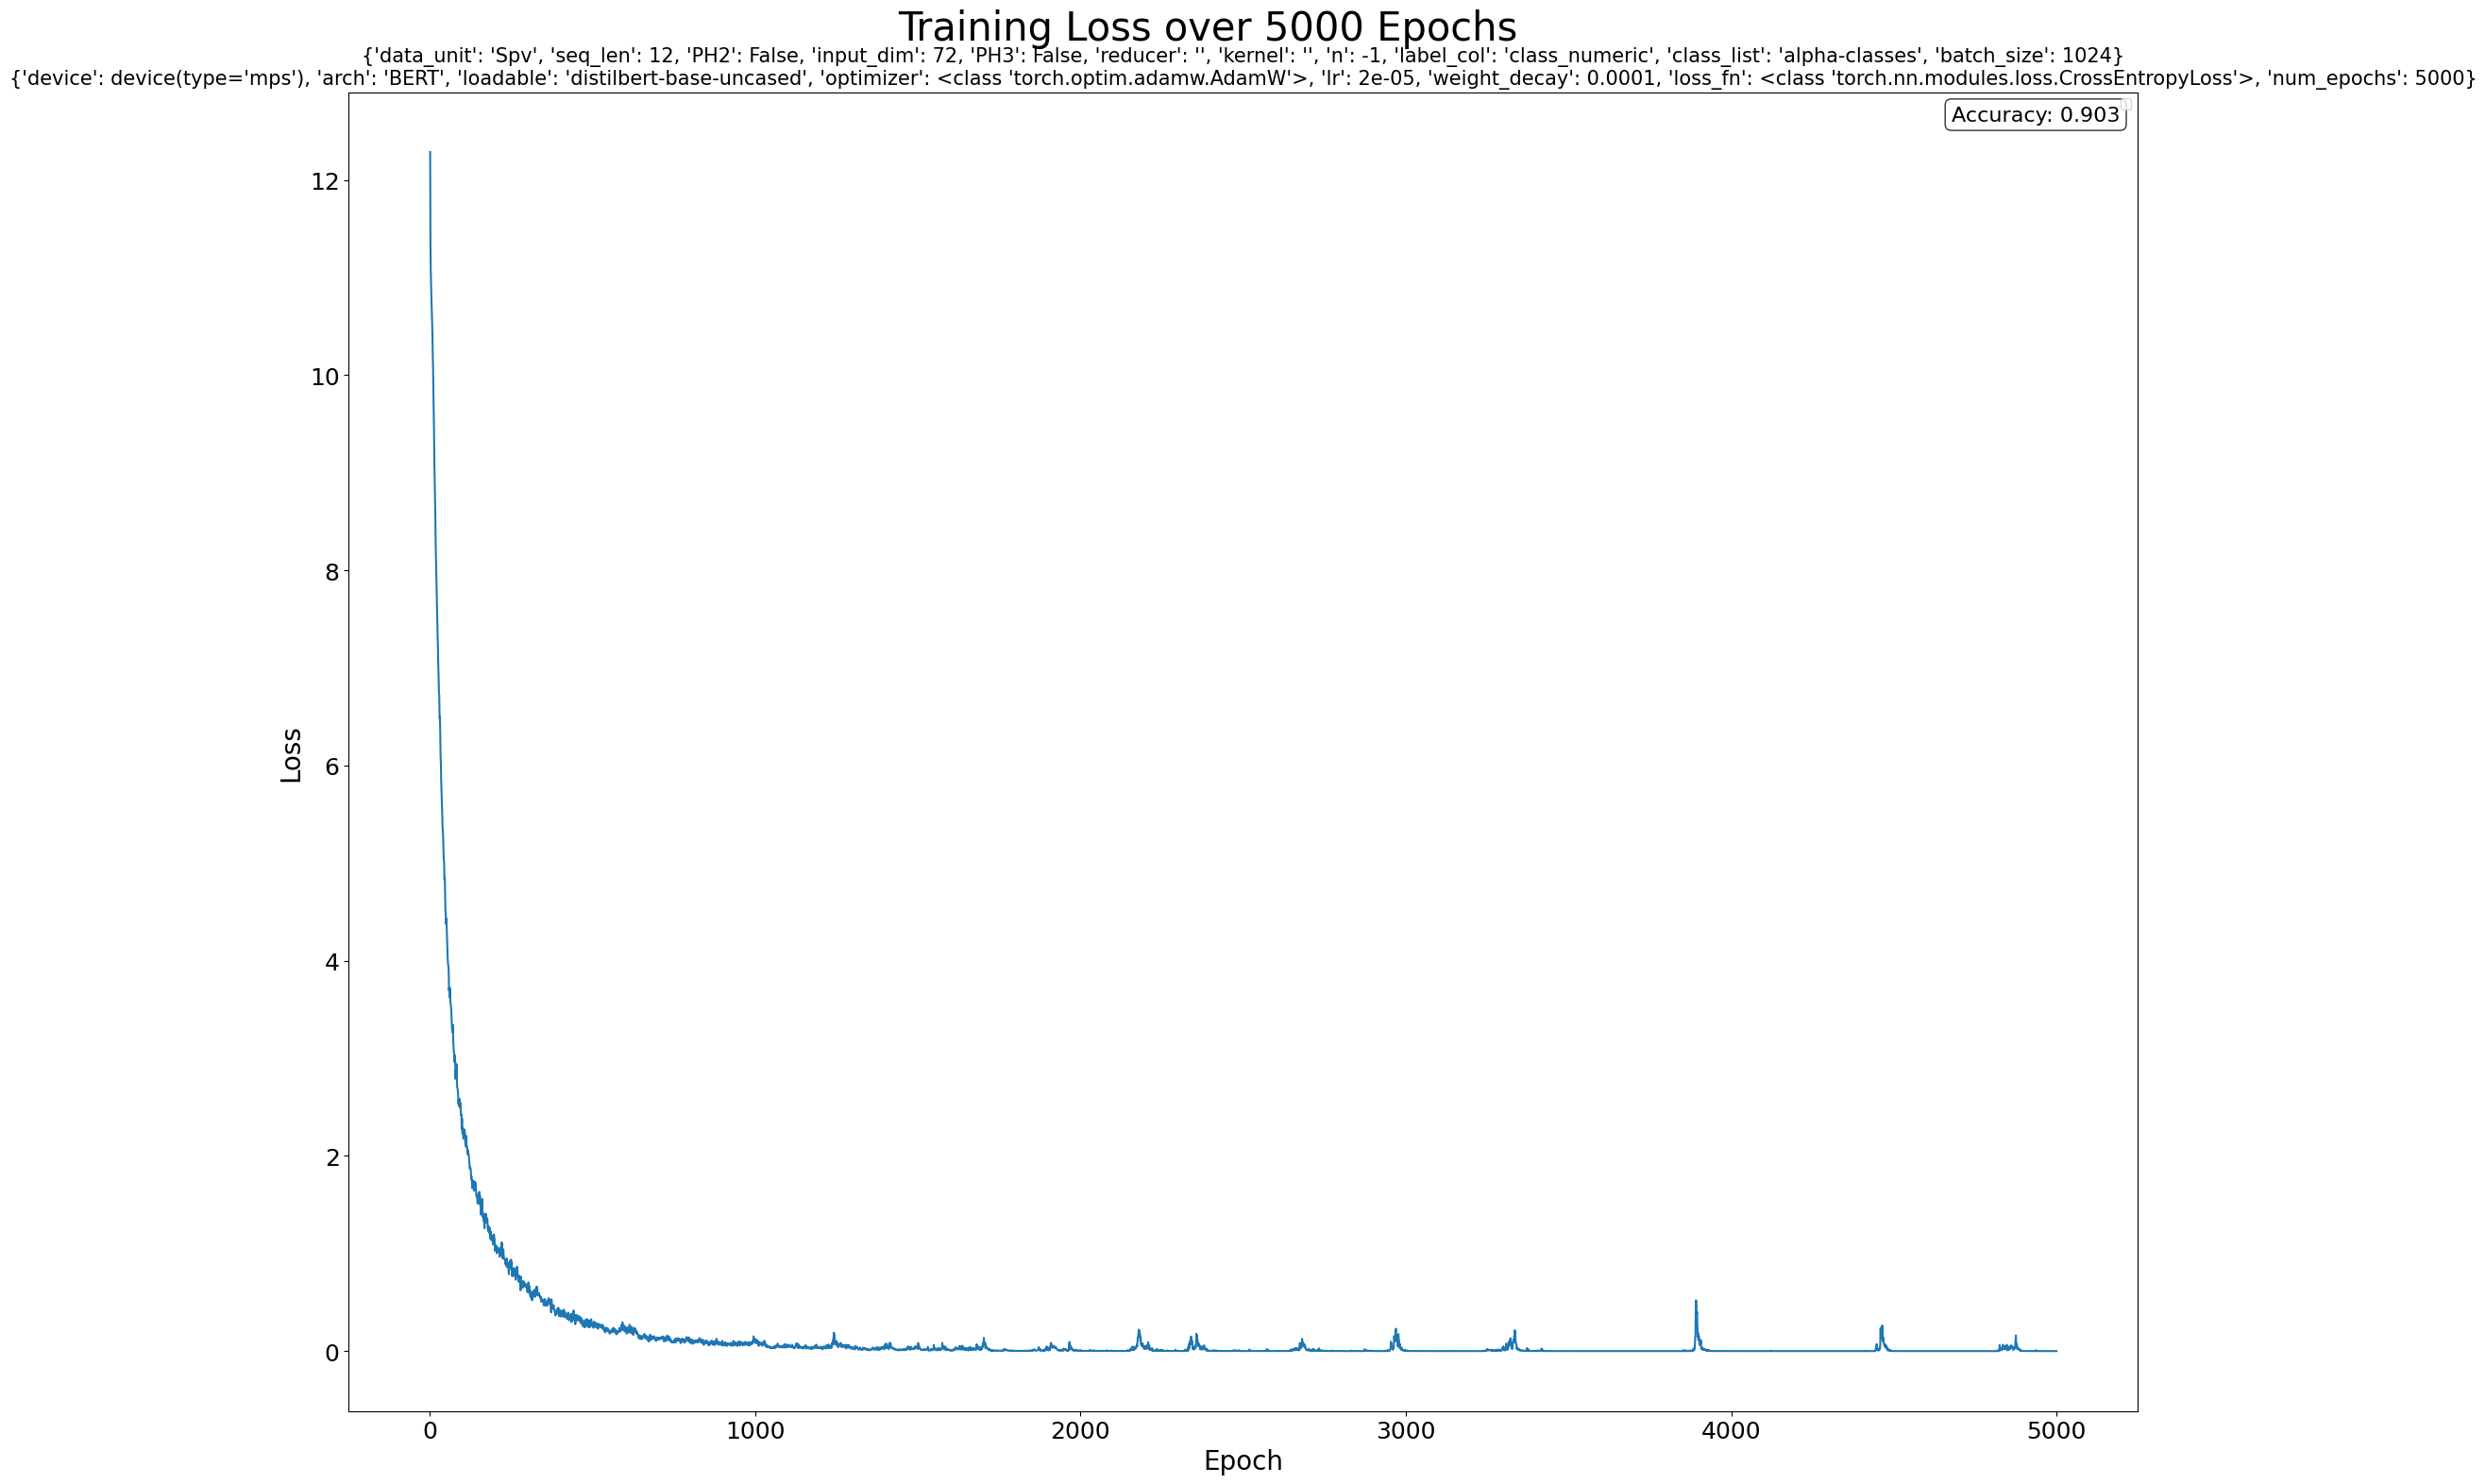

In [8]:
model.keep()